In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [15]:
data = pd.read_csv("/content/epa-sea-level.csv")
data.head()
data.tail()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058
133,2013,8.980315,8.622047,9.338583,8.546648


In [16]:
data.info()
data[['CSIRO Adjusted Sea Level', 'NOAA Adjusted Sea Level']].dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


,CSIRO Adjusted Sea Level,NOAA Adjusted Sea Level
113,6.291339,6.297493
114,6.500000,6.310934
115,6.618110,6.452569
116,6.787402,6.627631
117,7.066929,6.733920
118,6.665354,6.865806
119,7.011811,6.848690
120,7.062992,6.920582
121,7.287402,7.087460
122,7.381890,7.319698


In [17]:
data = data[['Year', 'CSIRO Adjusted Sea Level']]
data.head()

,Year,CSIRO Adjusted Sea Level
0,1880,0.000000
1,1881,0.220472
2,1882,-0.440945
3,1883,-0.232283
4,1884,0.590551


In [18]:
def plot_scatter_with_line(data, start=False, end=False):
  extend=False
  x_min = data.iloc[:, 0].iloc[0]
  x_max = data.iloc[:, 0].iloc[-1]
  start = start if start > x_min and start < x_max else x_min
  if end <= x_max:
    end = end if end > x_min else x_max
  else:
    extend = end + 1

  data = data[(data.iloc[:, 0] >= start) & (data.iloc[:, 0] <= end)]
  x = data.iloc[:, 0]
  y = data.iloc[:, 1]

  plt.scatter(x, y, color='#aa3244')
  slope, intercept = linregress(x, y)[:2]
  if extend:
    x = pd.concat([x, pd.Series(range(x_max, extend))])
  line_of_best_fit = slope*x + intercept

  plt.plot(x, line_of_best_fit, color='#2222aada', linewidth=2.3)

  plt.title('CSIRO Adjusted Sea Level per year')
  plt.ylabel('Sea level(inches)')
  plt.xlabel('Year')

  plt.grid(True, 'both', alpha=0.2, color='black')
  plt.minorticks_on()

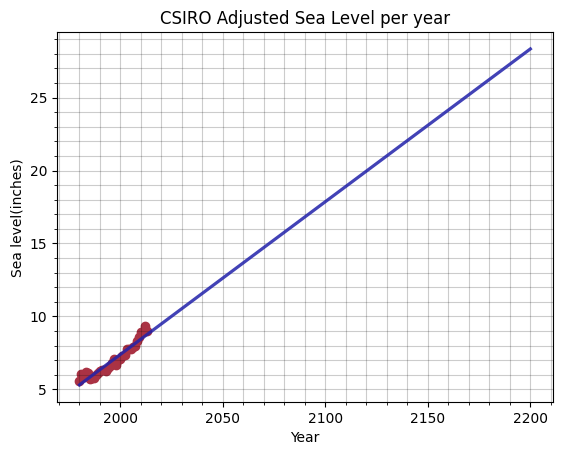

In [19]:
start = 1980
end = 2200
plot_scatter_with_line(data, start=start, end=end)